# Kaggle house prices with fastai v2 & nbdev
> This repo purpose is to highlight the `nbdev` tool on the kagge house prices data set using the fastai2 package.

In [ ]:
#hide
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#hide
import pandas as pd
from fastai2.tabular.all import *
from fastai2 import metrics
from sklearn import ensemble
import shap
from kaggle_house_prices.utils import *
from kaggle_house_prices.preprocessing import *
from kaggle_house_prices.modelling import *
from kaggle_house_prices.inspection import *
import matplotlib as mpl

In [ ]:
mpl.style.use("bmh")

## Get leaderboard and competition data

First you will need to collect the train and test data from kaggle. Because it is instructive to visualize where the field is in terms of scores we also download the leaderboard data. The following assumed you have set up a kaggle account. If that's not the case check out this site [here](https://github.com/Kaggle/kaggle-api).

In [ ]:
# !kaggle competitions leaderboard {competition} -d -p {dir_leaderboard}

In [ ]:
# !kaggle competitions download -c {competition} -p {dir_raw_data}

In [ ]:
# extract_zip_files(compressed_leaderboard_file)

In [ ]:
# extract_zip_files(compressed_data_file)

## Preprocessing

In [ ]:
df = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [ ]:
display_all(df_test.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
show_na_share(df, cont_names)

MasVnrArea: 0.55 %
GarageYrBlt: 5.55 %
LotFrontage: 17.74 %


In [ ]:
show_na_share(df, cat_names)

Alley: 93.77 %
MasVnrType: 0.55 %
BsmtQual: 2.53 %
BsmtCond: 2.53 %
BsmtExposure: 2.60 %
BsmtFinType1: 2.53 %
BsmtFinType2: 2.60 %
Electrical: 0.07 %
FireplaceQu: 47.26 %
GarageType: 5.55 %
GarageFinish: 5.55 %
GarageQual: 5.55 %
GarageCond: 5.55 %
PoolQC: 99.52 %
Fence: 80.75 %
MiscFeature: 96.30 %


In [ ]:
val_col = "is_valid"
df = get_split(df, valid_pct=.2, val_col=val_col)
display(df[val_col].value_counts())

False    1168
True      292
Name: is_valid, dtype: int64

In [ ]:
df[dep_var] = df[dep_var].apply(np.log)

Anticipating columns with missing values

In [ ]:
%%time
cont_fill_vals = {col: np.nanmedian(df.loc[df[val_col]==False, col]) for col in cont_names}
cont_fill_vals

CPU times: user 9.63 ms, sys: 680 µs, total: 10.3 ms
Wall time: 10.6 ms


{'LotArea': 9423.0,
 'YearBuilt': 1973.0,
 'YearRemodAdd': 1994.0,
 'MasVnrArea': 0.0,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': 469.0,
 'TotalBsmtSF': 1002.5,
 '1stFlrSF': 1086.0,
 '2ndFlrSF': 0.0,
 'GrLivArea': 1456.0,
 'GarageYrBlt': 1980.0,
 'GarageArea': 478.0,
 'WoodDeckSF': 0.0,
 'OpenPorchSF': 24.0,
 'LotFrontage': 70.0,
 'BsmtFinSF1': 384.0,
 'LowQualFinSF': 0.0}

Defining fastai2's internal transforms

In [ ]:
procs = [Categorify, FillMissing, Normalize]

Providing training/validation split info using the `val_col` added to `df` above using `get_split`

In [ ]:
splits = ColSplitter(col=val_col)(df)

Substituting potential unexpected nans in the valdiation set

In [ ]:
ix_train = df[val_col]==False
df.loc[~ix_train,:] = deal_with_continuous_nans(df.loc[ix_train,:], df.loc[~ix_train,:], 
                                                cont_names, cont_fill_vals)

Initializing a `TabularPandas` object to transform and feed data to the learner

In [ ]:
to = TabularPandas(df, procs=procs, cat_names=list(cat_names), cont_names=list(cont_names),
                   y_names=dep_var, splits=splits)

In [ ]:
display_all(df.iloc[splits[1]][cat_names].head())

,Id,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition
1168,1169,70,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,2Story,6,7,Hip,CompShg,Stucco,Stucco,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,4,1,Gd,7,Typ,2,TA,Basment,Unf,2,TA,TA,Y,0,0,90,0,NaN,NaN,NaN,0,7,WD,Normal
1169,1170,60,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,Hip,CompShg,HdBoard,HdBoard,BrkFace,Gd,Gd,PConc,Ex,TA,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,Fin,3,TA,TA,Y,0,0,0,0,NaN,NaN,NaN,0,7,WD,Normal
1170,1171,80,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,TA,TA,Av,ALQ,Unf,GasA,TA,Y,SBrkr,1,0,1,0,3,1,TA,6,Typ,1,Po,Attchd,Fin,1,TA,TA,Y,0,0,0,576,Gd,GdPrv,NaN,0,7,WD,Normal
1171,1172,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,1,0,1,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,0,0,288,0,NaN,NaN,Shed,1400,11,WD,Normal
1172,1173,160,FV,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,Gable,CompShg,MetalSd,MetalSd,None,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,1,2,1,Gd,5,Typ,0,NaN,Detchd,Fin,2,TA,TA,Y,0,0,0,0,NaN,NaN,NaN,0,3,WD,Normal


In [ ]:
display_all(to.valid.xs[cat_names].head())

,Id,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition
1168,0,7,4,2,0,4,4,1,1,1,8,3,3,1,6,6,7,4,1,10,12,3,4,5,2,4,4,4,5,6,1,1,2,5,1,1,3,1,5,2,3,6,7,3,5,3,3,3,5,5,3,1,1,5,1,0,0,0,1,7,9,5
1169,0,6,4,2,0,1,4,1,2,1,16,3,3,1,6,10,5,4,1,6,6,2,3,3,3,1,4,2,3,6,1,1,2,5,2,1,4,2,5,2,3,9,7,2,5,2,1,4,5,5,3,1,1,1,1,0,0,0,1,7,9,5
1170,0,9,4,2,0,4,4,1,5,1,12,3,3,1,8,6,6,2,1,8,10,3,4,5,2,4,4,1,1,6,1,5,2,5,2,1,2,1,4,2,4,5,7,2,4,2,1,2,5,5,3,1,1,1,0,0,1,0,1,7,9,5
1171,0,1,4,2,0,4,4,1,5,1,13,3,3,1,3,6,6,4,1,7,8,3,4,5,2,4,4,4,1,6,1,1,2,5,2,1,2,1,4,2,4,5,7,2,5,2,2,3,5,5,3,1,1,0,1,0,0,3,0,11,9,5
1172,0,13,2,2,2,1,4,1,5,1,22,3,3,5,6,7,5,2,1,7,8,3,3,5,3,3,4,4,6,6,1,1,2,5,1,1,3,2,3,2,3,4,7,1,0,6,1,3,5,5,3,1,1,1,1,0,0,0,1,3,9,5


Generating training and validation data loaders for the model development

In [ ]:
dls = to.dataloaders()

## Fitting a deep net model using `TabularLearner`

Defining the loss function

In [ ]:
loss_fun = torch.nn.functional.mse_loss

This step, defining `y_range`, is probably optional because in principle, given enough iterations, the model will predict `dep_var` in the correct range. But it is just a lot faster when using `y_range`.

In [ ]:
y_range = [min(to.valid.ys.values.min(), to.train.ys.values.min()), 
           max(to.valid.ys.values.max(), to.train.ys.values.max())]; y_range

[10.460242108190519, 13.534473028231162]

Instantiating the learner using a `TabularModel` class where the `__init__` method was altered to allow other activation functions, e.g. `modelling.Mish`, to be used in the model than the default ReLu. See `kaggle_house_prices.modelling` or `02_modelling.ipynb` for details.

In [ ]:
%%time
learn = tabular_learner(dls, n_out=1, loss_func=loss_fun, config=dict(active_fun=Mish),
                        y_range=y_range)

CPU times: user 14.7 ms, sys: 0 ns, total: 14.7 ms
Wall time: 14.8 ms


Looking for `max_lr`

CPU times: user 3.27 s, sys: 21.9 ms, total: 3.29 s
Wall time: 3.41 s


(0.006918309628963471, 4.3651581904669e-07)

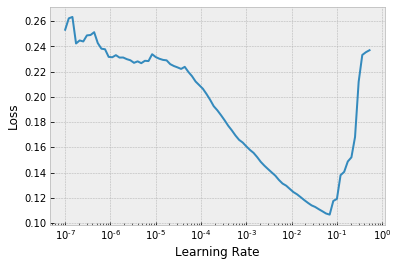

In [ ]:
%%time
learn.lr_find()

Training using the [one-cycle policy](https://arxiv.org/abs/1708.07120)

In [ ]:
%%time
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,time
0,0.115388,0.111801,00:00
1,0.061526,0.087842,00:00
2,0.039219,0.074567,00:00
3,0.026554,0.052907,00:00
4,0.019083,0.033261,00:00


CPU times: user 3.67 s, sys: 24.7 ms, total: 3.69 s
Wall time: 3.85 s


## Gauging model quality of the tabular learner

Making predictions over the validation set

In [ ]:
y_pred, y_true = learn.get_preds()

y_pred[:5], y_true[:5]

(tensor([[12.1796],
         [12.8250],
         [11.9164],
         [11.9764],
         [11.9624]]),
 tensor([[12.3673],
         [13.3455],
         [12.0494],
         [12.0015],
         [12.0547]]))

Comparing the score to the leader board (does not replace submitting the predictions over the test set)

,TeamId,TeamName,SubmissionDate,Score
7590,4210573,hsuanpingsun,2020-01-04 03:44:55,0.0
10044,4278029,Muhammet İkbal Elek,2020-01-20 13:09:34,0.0
9856,3740535,wentixiaogege,2020-01-19 03:37:57,0.0
4988,4155989,terracoda,2019-12-20 12:56:53,0.0
15086,2248598,predictor!,2020-02-15 13:51:49,0.0


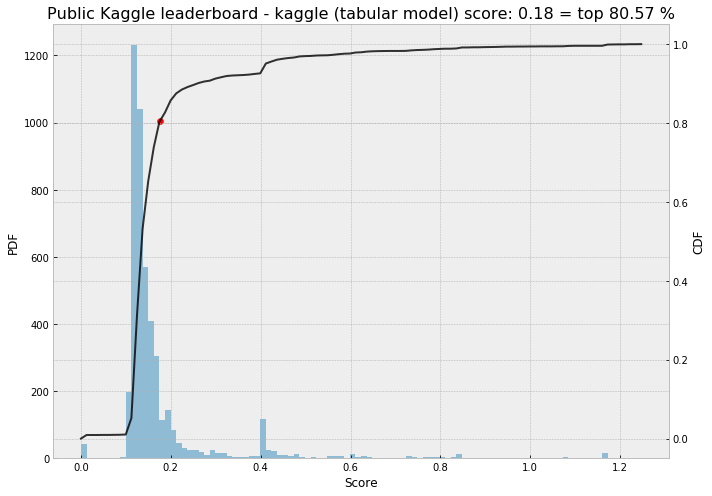

In [ ]:
# my_score = loss_fun(y_pred, y_true).item()
my_score = 0.17608  # after kaggle submission

show_leaderboard(fname_leaderboard, score_bounds=(None, 1.25), bins=100, user_score=my_score, user="kaggle (tabular model)")

Computing SHAP values for later inspection of the model. Because of the pytorch model is set up with fastai2's `TabularModel` one cannot directly pass it to the `shap.DeepExplainer`, rather one needs to wrap it using `inspection.FastaiModel`

In [ ]:
model = FastaiModel(learn, to)

In [ ]:
%%time
X = torch.from_numpy(to.valid.xs.values)
explainer = shap.DeepExplainer(model, X)
shap_values = explainer.shap_values(X)

CPU times: user 13.1 s, sys: 819 ms, total: 13.9 s
Wall time: 13.9 s


## Inspecting the embeddings

The "Id" embeddings are still very much normally distributed without significant clusters. Which liekly means that this columns was not really used at all by the embedding model

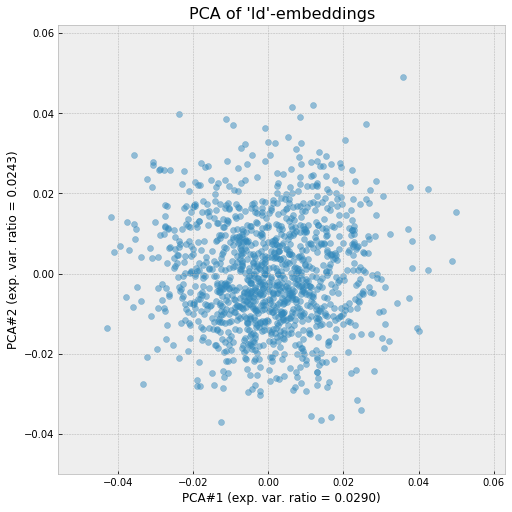

In [ ]:
show_embeddings_with_pca(learn, to, "Id");

## Fitting an ensemble model - `RandomForestRegressor`

In order to sanity check the fastai tabular model based on embeddings and a neural net let's fit a standard model

In [ ]:
ens = ensemble.RandomForestRegressor(n_estimators=100, max_features="sqrt", max_samples=.9, oob_score=True)

In [ ]:
%%time
ens.fit(to.train.xs.values, to.train.ys.values.ravel())

CPU times: user 415 ms, sys: 20 ms, total: 435 ms
Wall time: 436 ms


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=0.9, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
%%time
y_pred_ens = ens.predict(to.valid.xs.values)

CPU times: user 15.8 ms, sys: 0 ns, total: 15.8 ms
Wall time: 16 ms


,TeamId,TeamName,SubmissionDate,Score
7590,4210573,hsuanpingsun,2020-01-04 03:44:55,0.0
10044,4278029,Muhammet İkbal Elek,2020-01-20 13:09:34,0.0
9856,3740535,wentixiaogege,2020-01-19 03:37:57,0.0
4988,4155989,terracoda,2019-12-20 12:56:53,0.0
15086,2248598,predictor!,2020-02-15 13:51:49,0.0


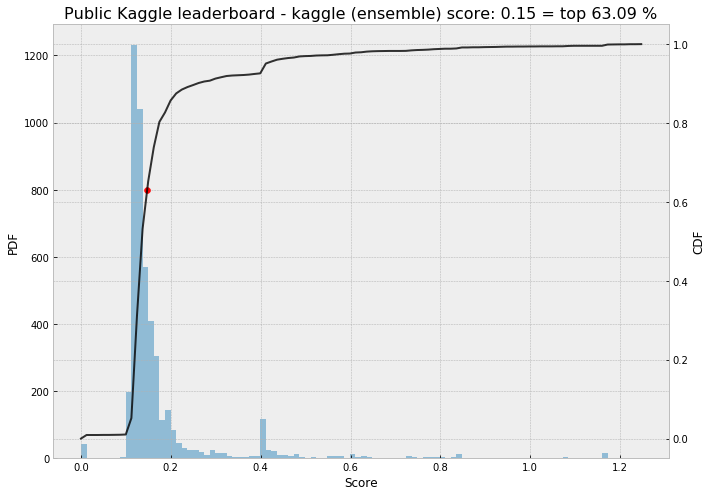

In [ ]:
# my_score_ens = loss_fun(torch.from_numpy(y_pred_ens[:,None]).float(), y_true).item()
my_score_ens = 0.14745  # after kaggle submission

show_leaderboard(fname_leaderboard, score_bounds=(None, 1.25), bins=100, user_score=my_score_ens, 
                 user="kaggle (ensemble)")

Computing SHAP values for the ensemble model

In [ ]:
%%time
_X = X.detach().numpy()
ens_explainer = shap.TreeExplainer(ens, _X)
ens_shap_values = ens_explainer.shap_values(_X)

 97%|=================== | 284/292 [00:39<00:01]       

CPU times: user 39.5 s, sys: 93.2 ms, total: 39.6 s
Wall time: 39.9 s


## SHAP summary plots

The [`shap`](https://github.com/slundberg/shap) package can be used to inspect how neural net and tree based arrive at their prediction. The SHAP paper can be found [here](https://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions). Using `shap.summary_plot` one can gauge the order in which features are relevant for model predictions and how they generally contribute, increasing or decreasing the predicted values.

In [ ]:
#hide
shap.initjs()

Inspecting the fastai's tabular model. It's quite suspicious that the shap value is approximately zero for the 16th/17th feature onwards

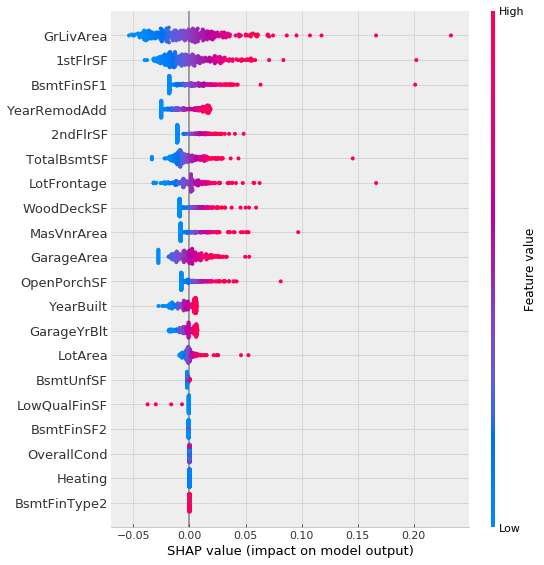

In [ ]:
shap.summary_plot(shap_values, to.valid.xs)

Inspecting the ensemble model

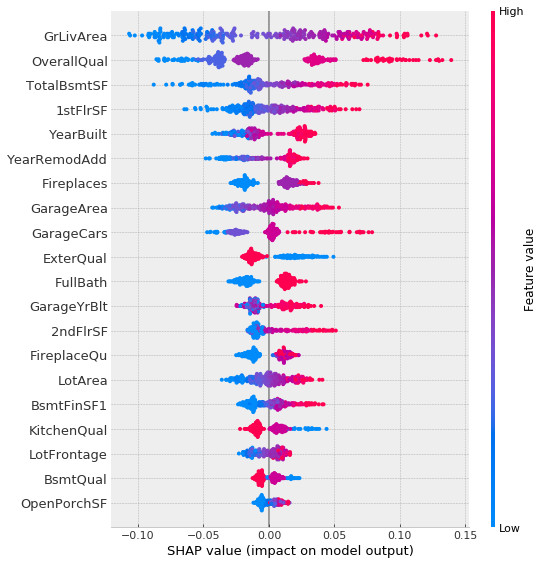

In [ ]:
shap.summary_plot(ens_shap_values, to.valid.xs)

## Making predictions over unseen data

To actually use the trained models we need to predict over unseen data, here contained in `df_test`. To do this we first  need to deal with any unexpected nan values.

In [ ]:
df_test = deal_with_continuous_nans(df.loc[ix_train,:], df_test, cont_names, cont_fill_vals)

### Predictions using `TabularModel`

Creating `dl` for `learn.get_preds`

In [ ]:
dl = learn.dls.test_dl(df_test)

Making predictions

In [ ]:
res = learn.get_preds(dl=dl)

In [ ]:
res

(tensor([[11.8924],
         [11.9983],
         [12.0890],
         ...,
         [12.0910],
         [11.7224],
         [12.1997]]),
 None)

In [ ]:
preds = np.exp(res[0].detach().numpy()); preds

array([[146151.05],
       [162474.86],
       [177904.23],
       ...,
       [178251.7 ],
       [123299.32],
       [198735.83]], dtype=float32)

In [ ]:
preds = pd.DataFrame({"Id": df_test["Id"], "SalePrice":preds.ravel()}); preds.head()

,Id,SalePrice
0,1461,146151.046875
1,1462,162474.859375
2,1463,177904.234375
3,1464,191884.875000
4,1465,173687.828125


In [ ]:
preds.to_csv("../data/submission_tm.csv", index=False)

### Predictions using the ensemble model

In [ ]:
dl.xs.head()

,Id,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,LotFrontage,BsmtFinSF1,LowQualFinSF
0,0,1,3,2,0,4,4,1,5,1,...,-0.696760,-0.784944,-1.196857,-0.734762,1.223488,0.367464,-0.703697,0.471615,0.059819,-0.124196
1,0,1,4,2,0,1,4,1,1,1,...,0.462171,-0.784944,-0.341786,-0.860096,-0.759950,2.415426,-0.154205,0.518572,1.103552,-0.124196
2,0,6,4,2,0,1,4,1,5,1,...,-0.611111,0.836141,0.250642,0.769243,0.046711,0.950283,-0.184732,0.189876,0.800755,-0.124196
3,0,6,4,2,0,1,4,1,5,1,...,-0.616464,0.782953,0.201273,0.811021,-0.010230,2.148300,-0.154205,0.377702,0.367204,-0.124196
4,0,12,4,2,0,1,2,1,5,1,...,0.331022,-0.784944,-0.438549,0.560354,0.160593,-0.765796,0.547924,-1.265774,-0.410435,-0.124196


In [ ]:
preds = ens.predict(dl.xs); preds

array([11.68657222, 11.9093085 , 12.10909732, ..., 12.00105714,
       11.637718  , 12.34619474])

In [ ]:
preds = np.exp(preds); preds

array([118963.52623408, 148643.85728658, 181515.67986175, ...,
       162926.93737562, 113291.33939604, 230082.8500568 ])

In [ ]:
preds = pd.DataFrame({"Id": df_test["Id"], "SalePrice":preds.ravel()}); preds.head()

,Id,SalePrice
0,1461,118963.526234
1,1462,148643.857287
2,1463,181515.679862
3,1464,189349.977314
4,1465,192518.245261


In [ ]:
preds.to_csv("../data/submission_ens.csv", index=False)